## Level 1
Exact expectation = 5.5 * 0.7kr = 3.85kr per BT

In [35]:
import numpy as np
import matplotlib.pyplot as plt

In [36]:
set_size = 100000

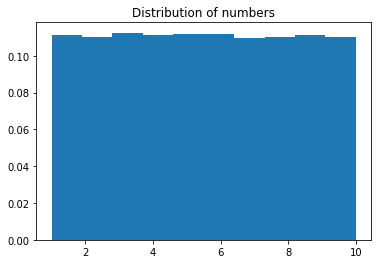

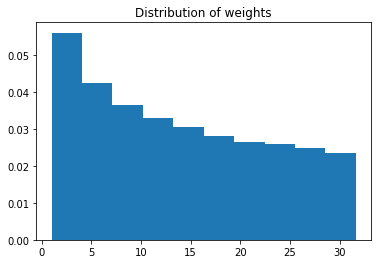

In [47]:
monte_carlo_rand_num = np.random.uniform(1, 10, set_size)
plt.hist(monte_carlo_rand_num, density=True)
plt.title("Distribution of numbers")
plt.show()

def m(x):
    return np.power(x, 1.5)

plt.hist(np.vectorize(lambda x: m(x))(monte_carlo_rand_num), density=True)
plt.title("Distribution of weights")
plt.show()

Mean value from 100 000 random numbers selling scraps: 9.798668353729424
Standard deviation: 6.305124310818776
11.180339887498949


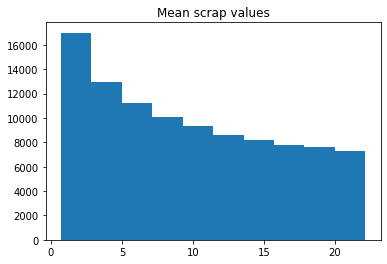

In [38]:
values = np.vectorize(lambda x: m(x)*0.7)(monte_carlo_rand_num)
monte_carlo_scrap_sim = np.mean(values)
std = np.std(values)
print("Mean value from 100 000 random numbers selling scraps:", monte_carlo_scrap_sim)
print("Standard deviation:", std)
plt.hist(values)
plt.title("Mean scrap values")
plt.show()

Approximate $\approx$ 9.8


### Level 2


Mean value from 100 000 random numbers hanging with magic string: 103.85704541344278
Standard deviation: 1.4355830985853513


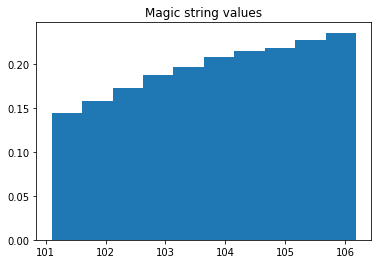

In [39]:
def BT_Fredriksen_price(x):
    return 100 + 1.1*np.sqrt(m(x))

values = np.vectorize(lambda x: BT_Fredriksen_price(x))(monte_carlo_rand_num)
hanging_magic_string_sum = np.mean(values)
std = np.std(values)
print("Mean value from 100 000 random numbers hanging with magic string:",hanging_magic_string_sum)
print("Standard deviation:", std)
plt.hist(values, density=True)
plt.title("Magic string values")
plt.show()

Approximate $\approx$ 103.85

### Level 3

In [40]:
with open("../Data/brands.txt") as brands_table:
    table = brands_table.read()

table = table.split()

i = 0
table_dict = {}
while i < len(table):
    table_dict[table[i]] = (eval(table[i+1]), eval(table[i+3]), eval(table[i+4]), eval(table[i+6]), eval(table[i+7]))
    i += 8

In [41]:
def prob(m, lamb, k):
    y = -(m/(1+(np.abs(lamb))))**(1+np.abs(k))
    return 1 - np.exp(y)

def break_string(brand, m):
    if brand == '0':
        return False
    x = np.random.rand()
    k = np.random.normal(table_dict[brand][0], table_dict[brand][1], 1)[0]
    lamb = np.random.normal(table_dict[brand][2], table_dict[brand][3], 1)[0]
    return x >= prob(m, lamb, k)

def string_price(brand):
    return table_dict[brand][4] if brand != '0' else 0

In [42]:
l = []
for key in table_dict.keys():
    values = np.vectorize(lambda x: (BT_Fredriksen_price(x) if break_string(key, m(x))
                                    else m(x)*0.7)-table_dict[key][4])(monte_carlo_rand_num)
    earnings = np.mean(values)
    std = np.std(values)
    print("Brand:", key,"expected earnings:", earnings)
    print("Standard error:", std/np.sqrt(len(values)), '\n')
    l.append(earnings)

Brand: 1 expected earnings: 37.43990747492338
Standard error: 0.1368796773145185 

Brand: 2 expected earnings: 38.614891545811936
Standard error: 0.1388704072508176 

Brand: 3 expected earnings: 24.797393051923518
Standard error: 0.11527060521510435 

Brand: 4 expected earnings: 14.903830636056169
Standard error: 0.11525828282577566 

Brand: 5 expected earnings: 50.3955995498869
Standard error: 0.137105693268711 

Brand: 6 expected earnings: 34.83491322730827
Standard error: 0.1349413452756485 

Brand: 7 expected earnings: 37.066309769362334
Standard error: 0.1370124212516232 

Brand: 8 expected earnings: 35.046354431492716
Standard error: 0.13111324657194914 

Brand: 9 expected earnings: 42.684059380969956
Standard error: 0.13871664178052537 

Brand: 10 expected earnings: 32.15728220502947
Standard error: 0.12756859601841342 



Brand 5 has the highest earnings with $\approx$ 50


In [43]:
def random_brand(x):
    y = np.random.randint(1,11)
    return (BT_Fredriksen_price(x) if break_string(str(y), m(x))
     else m(x)*0.7)-table_dict[str(y)][4]

values = np.vectorize(lambda x: random_brand(x))(monte_carlo_rand_num)
print("Expected value:", np.mean(values))
print("Standard error:", np.std(values)/np.sqrt(len(values)))


Expected value: 34.73570148293177
Standard error: 0.13459594874689973


The expected value of a uniformly random choice brand is $\approx$ 34.6, so Hubert shouldn't sell to the guy his guy knows!!


In [44]:
def hubert_take_steps(n, epsilon, alpha=0.1):
    avg_earnings = {}
    plot_earnings = {}
    for key in table_dict.keys():
        avg_earnings[key] = 0
        plot_earnings[key] = [0]

    #Adding brand 0, which is selling to a guy who knows our guy...
    avg_earnings['0'] = 0
    plot_earnings['0'] = []

    reward = 0
    bts = np.random.uniform(1, 10, n)
    for i, bt in enumerate(bts):
        p = np.random.rand()
        if i == 0 or p > 1-epsilon:
            max_key = str(np.random.randint(11))
        else:
            max_key = max(avg_earnings, key=avg_earnings.get)
        c_reward = (BT_Fredriksen_price(bt) if break_string(max_key, m(bt)) else m(bt)*0.7)- (string_price(max_key))
        reward += c_reward
        avg_earnings[max_key] += alpha*(c_reward-avg_earnings[max_key])
        plot_earnings[max_key].append(c_reward)
    return plot_earnings, avg_earnings, reward

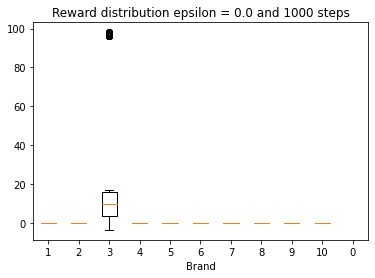

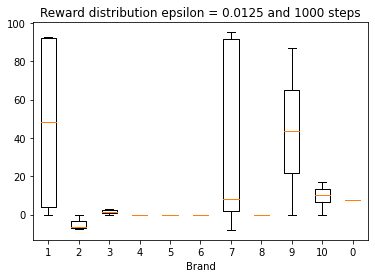

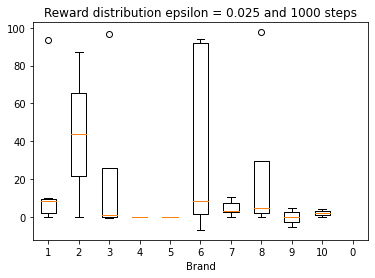

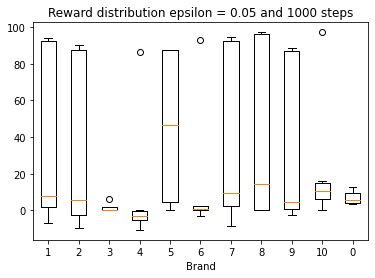

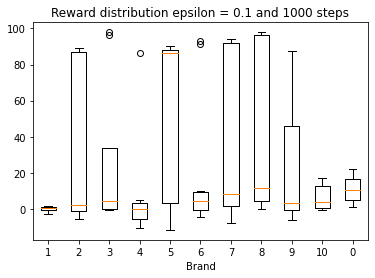

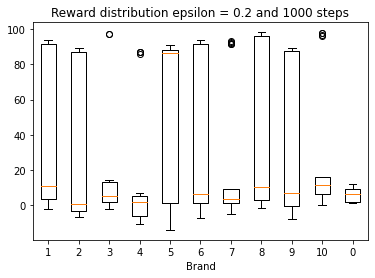

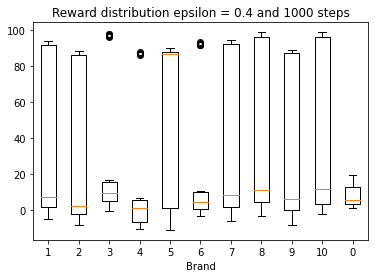

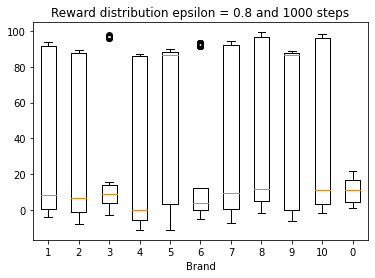

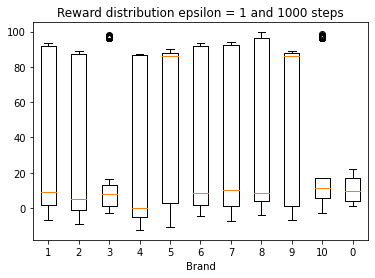

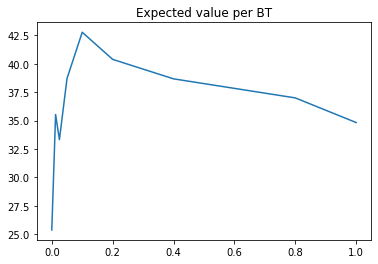

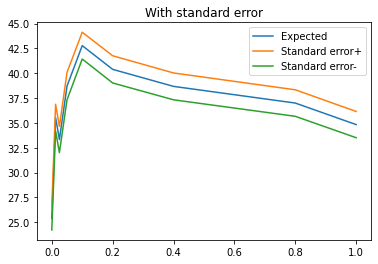

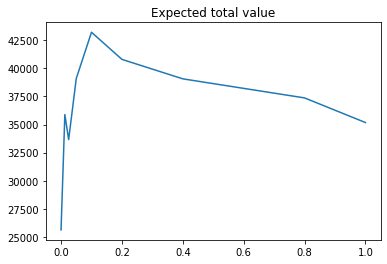

In [45]:
e_of_x = []
t_of_x = []
std_of_xp = []
std_of_xm = []
epsilon_values = []
epsi = 0.0
for i in range(9):

    plot_earnings, avg_earnings, reward = hubert_take_steps(1000, min(epsi, 1))
    plt.boxplot([plot_earnings[k] for k in plot_earnings.keys()], labels=plot_earnings.keys())
    plt.title("Reward distribution epsilon = " + str(min(epsi, 1)) + " and " + str(1000) + " steps")
    plt.xlabel("Brand")
    plt.show()
    l = []
    for k in plot_earnings.keys():
        l.extend(plot_earnings[k])

    e = np.mean(l)
    t = np.sum(l)
    std = np.std(l)/np.sqrt(len(l))
    e_of_x.append(e)
    t_of_x.append(t)
    std_of_xp.append(e+std)
    std_of_xm.append(e-std)
    epsilon_values.append(min(epsi, 1))

    epsi = epsi * 2 if i != 0 else 0.0125
plt.plot(epsilon_values, e_of_x)
plt.title("Expected value per BT")
plt.show()

plt.plot(epsilon_values, e_of_x, label="Expected")
plt.plot(epsilon_values, std_of_xp, label="Standard error+")
plt.plot(epsilon_values, std_of_xm, label="Standard error-")
plt.legend(loc="upper right")
plt.title("With standard error")
plt.show()

plt.plot(epsilon_values, t_of_x)
plt.title("Expected total value")
plt.show()

### Level 4

Epsilon = 0 is only greedy decisions, so Hubert will never explore and try new things, while
Epsilon = 1 is the opposite with Hubert only exploring, only taking random actions.

If Q1(a) was initialized to a more optimistic value it would then be able to start with Epsilon = 0
and choose new brands until it found the best one. With a high value it would try all brands until
one of the best averages was found.

According to my tests at 1000 BT's Hubert should aim for $\approx$ Epsilon = 0.2. Which would give him
earnings of $\approx$ 43kr per BT vs 34kr per BT when choosing at random.

On smaller samples I think a higher Epsilon would help to find the best average faster, and maybe not
use brands with high standard deviation, so no taking as big risks since it could easily loose him money
in the short term.

On larger samples in this case it could be good to have a decreasing Epsilon so Hubert didn't waste time
exploring when he found the best brand, since the brands don't change in our example, if they did we shouldn't
decrease epsilon. A smaller epsilon so Hubert didn't loose as much money when he found a good solution, and
be willing to take risks since on average it could pay of in the long run.


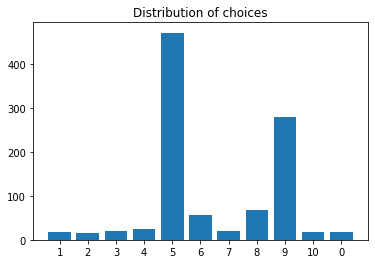

In [46]:
plot_earnings, avg_earnings, reward = hubert_take_steps(1000, 0.2)
plt.bar(plot_earnings.keys(), [len(plot_earnings[k]) for k in plot_earnings.keys()])
plt.title("Distribution of choices")
plt.show()

The distribution of choices can vary on 1000 samples, but most often brand 5 is used as the best option. So no real
surprises.

### Level 5

This could help him choose string brand because some brands work better at higher weights, brand 2 for example works
a lot better on higher weights than brand 5. He could keep track of 2 different average
values for > 10 and < 10 and first weigh the BT, then he choose which brand. Here it would
be smart to use different epsilon depending on the distribution of the BT's. This could lead to the combination of two
new brands being the best.